In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv(r"C:\Users\sharm\Desktop\Dataset\messy_housing_data.csv")

In [2]:
df.head()


,area_sqft,bedrooms,bathrooms,year_built,price,location
0,2696,4.0,1,1962.0,2068779.98,austin
1,2017,6.0,4,2008.0,1539208.46,San Francisco
2,1592,3.0,3,1991.0,557909.7,San Francisco
3,3358,2.0,4,1914.0,NaN,chicago
4,1624,2.0,5,1935.0,716945.96,New York City


In [3]:
df.shape


(420, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_sqft   420 non-null    int64  
 1   bedrooms    399 non-null    float64
 2   bathrooms   420 non-null    int64  
 3   year_built  384 non-null    float64
 4   price       370 non-null    object 
 5   location    420 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 19.8+ KB


In [7]:
df.isna().sum()

area_sqft      0
bedrooms      21
bathrooms      0
year_built    36
price         50
location       0
dtype: int64

In [9]:
df.describe(include="all")

,area_sqft,bedrooms,bathrooms,year_built,price,location
count,420.000000,399.000000,420.00000,384.000000,370,420
unique,NaN,NaN,NaN,NaN,345,43
top,NaN,NaN,NaN,NaN,unavailable,san francisco
freq,NaN,NaN,NaN,NaN,7,29
mean,2621.888095,3.593985,3.02381,1960.197917,NaN,NaN
std,1330.825892,2.386218,1.45067,37.715887,NaN,NaN
min,-100.000000,1.000000,1.00000,1900.000000,NaN,NaN
25%,1462.500000,2.000000,2.00000,1926.000000,NaN,NaN
50%,2602.000000,3.000000,3.00000,1959.000000,NaN,NaN
75%,3709.000000,5.000000,4.00000,1994.000000,NaN,NaN


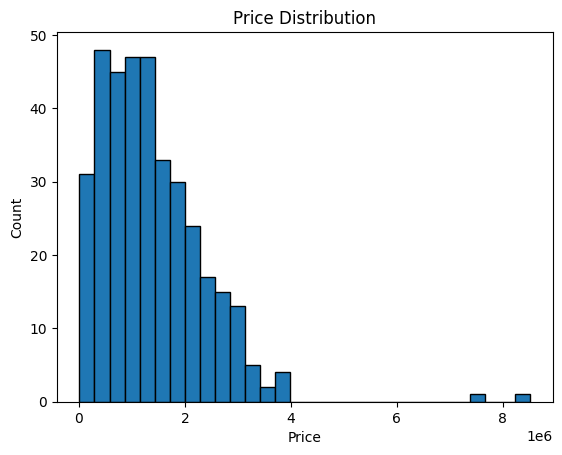

In [19]:
# convert price to numeric, force invalid strings to NaN
price_numeric = pd.to_numeric(df["price"], errors="coerce")

plt.hist(price_numeric, bins=30, edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Distribution")
plt.show()


Text(0, 0.5, 'count')

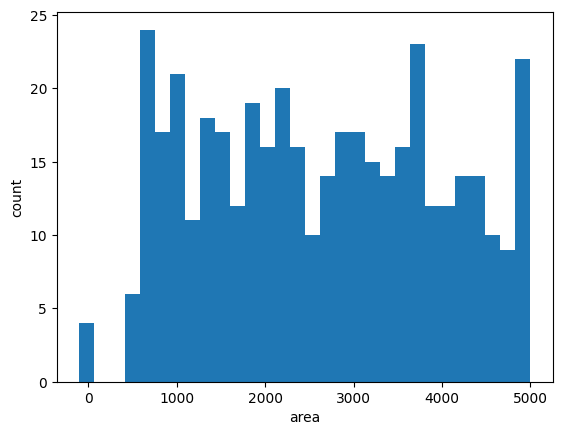

In [20]:
plt.hist(df["area_sqft"], bins =30)
plt.xlabel("area")
plt.ylabel("count")

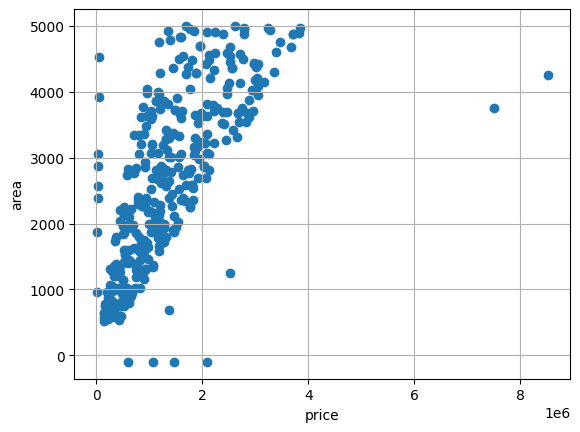

In [23]:
plt.scatter(price_numeric, df["area_sqft"])
plt.xlabel("price")
plt.ylabel("area")
plt.grid()

In [25]:
df = df[df["area_sqft"] > 0]
df["area_sqft"].min()

np.int64(515)

plt.scatter(price_numeric, df["area_sqft"])
plt.xlabel("price")
plt.ylabel("area")
plt.grid()

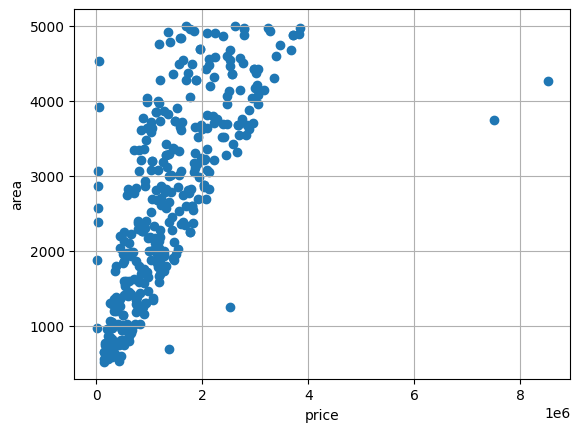

In [27]:
price_numeric = pd.to_numeric(df["price"], errors="coerce")
plt.scatter(price_numeric, df["area_sqft"])
plt.xlabel("price")
plt.ylabel("area")
plt.grid()

In [35]:
df[df["area_sqft"] > 4960].count()

area_sqft     6
bedrooms      6
bathrooms     6
year_built    6
price         6
location      6
dtype: int64

In [38]:
df["area_log"] = np.log(df["area_sqft"])

In [39]:
df["price_numeric"] = pd.to_numeric(df["price"], errors="coerce")
df["price_log"] = np.log(df["price_numeric"])


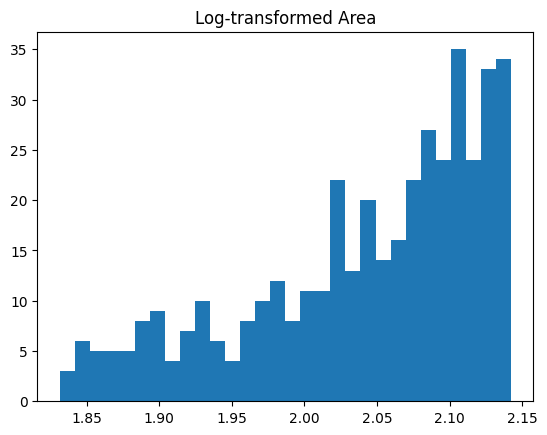

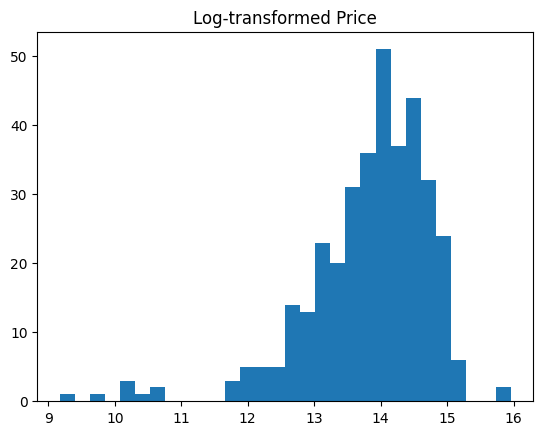

In [40]:
plt.hist(df["area_log"], bins=30)
plt.title("Log-transformed Area")
plt.show()

plt.hist(df["price_log"], bins=30)
plt.title("Log-transformed Price")
plt.show()


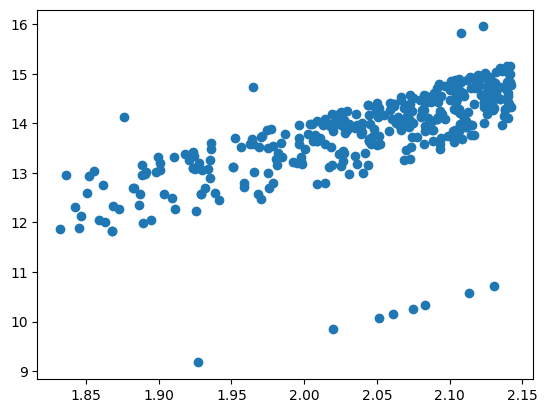

In [42]:
plt.scatter(df["area_log"], df["price_log"])

In [43]:
df.head()

,area_sqft,bedrooms,bathrooms,year_built,price,location,price_numeric,price_log,area_log
0,7.899524,4.0,1,1962.0,2068779.98,austin,2068779.98,14.542470,2.066803
1,7.609367,6.0,4,2008.0,1539208.46,San Francisco,1539208.46,14.246779,2.029380
2,7.372746,3.0,3,1991.0,557909.7,San Francisco,557909.70,13.231952,1.997790
3,8.119101,2.0,4,1914.0,NaN,chicago,NaN,NaN,2.094219
4,7.392648,2.0,5,1935.0,716945.96,New York City,716945.96,13.482756,2.000486


In [45]:
plt.savefig("price outlier.png")

<Figure size 640x480 with 0 Axes>

In [46]:
# drop rows where target is missing
df = df.dropna(subset=["price_numeric"])

# fill bedrooms with median
df["bedrooms"] = df["bedrooms"].fillna(df["bedrooms"].median())

# fill year_built with median
df["year_built"] = df["year_built"].fillna(df["year_built"].median())


In [47]:
df.isna().sum()

area_sqft        0
bedrooms         0
bathrooms        0
year_built       0
price            0
location         0
price_numeric    0
price_log        0
area_log         0
dtype: int64

In [48]:
df.describe()

,area_sqft,bedrooms,bathrooms,year_built,price_numeric,price_log,area_log
count,359.000000,359.000000,359.000000,359.000000,3.590000e+02,359.000000,359.000000
mean,7.738848,3.625348,3.008357,1960.267409,1.376545e+06,13.827500,2.043194
std,0.593140,2.282040,1.467502,35.730616,9.951146e+05,0.930139,0.079198
min,6.248043,1.000000,1.000000,1900.000000,9.640000e+03,9.173676,1.832268
25%,7.374001,2.000000,2.000000,1932.000000,6.551070e+05,13.392553,1.997960
50%,7.891705,3.500000,3.000000,1959.000000,1.180883e+06,13.981773,2.065812
75%,8.218787,5.000000,4.000000,1992.000000,1.885863e+06,14.449867,2.106423
max,8.516993,20.000000,5.000000,2026.000000,8.520000e+06,15.957927,2.142063


In [49]:
current_year = 2025

df.loc[df["year_built"] > current_year, "year_built"] = np.nan

df["year_built"] = df["year_built"].fillna(df["year_built"].median())

In [50]:
df.describe()

,area_sqft,bedrooms,bathrooms,year_built,price_numeric,price_log,area_log
count,359.000000,359.000000,359.000000,359.000000,3.590000e+02,359.000000,359.000000
mean,7.738848,3.625348,3.008357,1960.080780,1.376545e+06,13.827500,2.043194
std,0.593140,2.282040,1.467502,35.560895,9.951146e+05,0.930139,0.079198
min,6.248043,1.000000,1.000000,1900.000000,9.640000e+03,9.173676,1.832268
25%,7.374001,2.000000,2.000000,1932.000000,6.551070e+05,13.392553,1.997960
50%,7.891705,3.500000,3.000000,1959.000000,1.180883e+06,13.981773,2.065812
75%,8.218787,5.000000,4.000000,1991.500000,1.885863e+06,14.449867,2.106423
max,8.516993,20.000000,5.000000,2024.000000,8.520000e+06,15.957927,2.142063
